In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [41]:
training_data = pd.read_csv('titanic_train.csv')

In [42]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


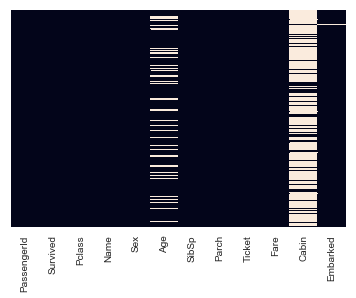

In [43]:
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False)

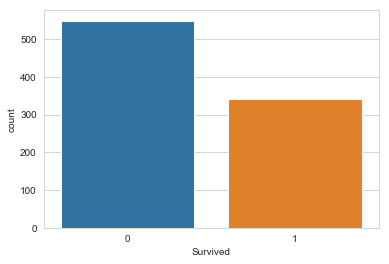

In [44]:
sns.countplot(x='Survived' , data = training_data)

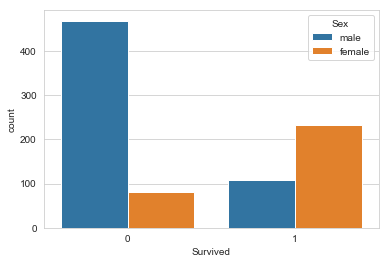

In [45]:
sns.countplot(x='Survived' , data = training_data , hue = 'Sex')

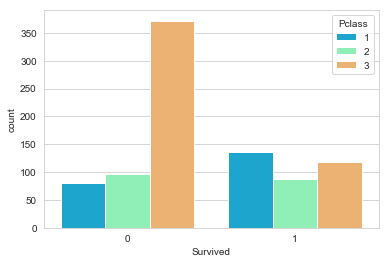

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=training_data,palette='rainbow')

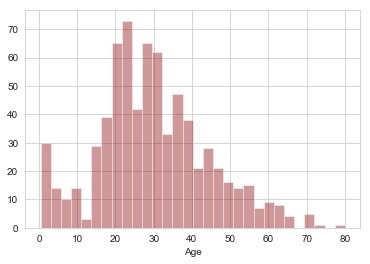

In [47]:
sns.distplot(training_data['Age'].dropna(),kde=False,color='darkred',bins=30)

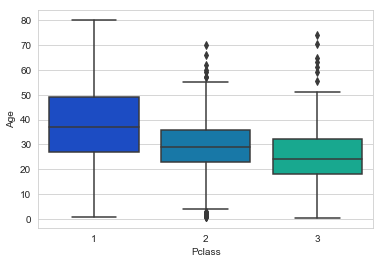

In [48]:
sns.boxplot(x='Pclass',y='Age',data=training_data,palette='winter')

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [50]:
training_data['Age'] = training_data[['Age','Pclass']].apply(impute_age,axis=1)

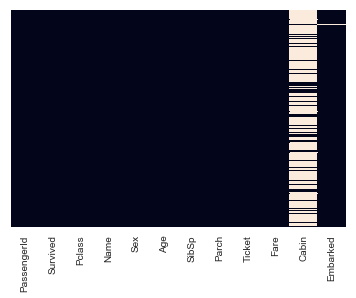

In [51]:
sns.heatmap(training_data.isnull() , yticklabels=False , cbar=False)

In [52]:
training_data.drop('Cabin' , inplace=True , axis = 1)

In [53]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
sex = pd.get_dummies(training_data['Sex'],drop_first=True)
embark = pd.get_dummies(training_data['Embarked'],drop_first=True)

In [55]:
training_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
training_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [57]:
training_data = pd.concat([training_data,sex,embark],axis=1)

In [59]:
from sklearn.model_selection import train_test_split


In [61]:
x_train , x_test , y_train, y_test = train_test_split(training_data.drop('Survived',axis=1), 
                                                    training_data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()
model.fit(x_train , y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
pred = model.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       176
           1       0.64      0.79      0.71        92

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.78      0.76       268
weighted avg       0.80      0.78      0.78       268



In [58]:
training_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
